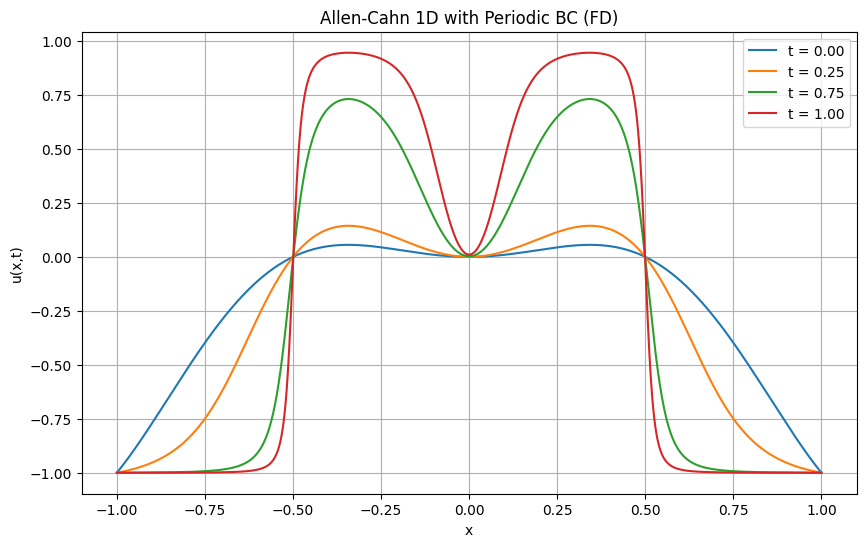

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#We will process FD for u on 2-dim domain of (x,t)

#to collect u point at (x,0), define dx and input variable x
dx = 0.001
Lx = 1- (-1)
Nx = int(Lx/dx)
x = np.linspace(-1, 1,Nx)# 1 contained?

#defind u by initial condition of u at t=0
u = x**2 * np.cos(np.pi * x)


#defind boundary condition of u for every points of u
def BoundaryCondition(u):
    u[0] = u[-1]
    u[1] = u[-2]
    return u

#to collect u points at (const, t) for each point x = const based on above initialized u,
#define dt and input variable t
dt = 1e-4
T = 1

#To express the governing equation, define the function for u_xx. Here we use central difference approximation.
def u_xx(x, u):
    u_xx = (np.roll(u,-1) -2 * u + np.roll(u,1))/dx**2
    return u_xx
u_list = [u.copy()]
# as time increases, collect u points by updating new u at next time step
for n in list(range(int(T/dt)-2)):
    u = u + dt * (.0001*u_xx(x, u) - 4 * u**3 + 4*u)
    u = BoundaryCondition(u)
    if n %100 == 0:
        u_list.append(u.copy())
# Plot u(x,t) at selected times
sample_times = [0.0, 0.25, 0.75, 1.0]
sample_indices = [int(t / dt / 100) for t in sample_times]

plt.figure(figsize=(10, 6))
for idx, t in zip(sample_indices, sample_times):
    plt.plot(x, u_list[idx], label=f't = {t:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Allen-Cahn 1D with Periodic BC (FD)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
u_list

[array([-1.        , -0.99799507, -0.99598232, ..., -0.99598232,
        -0.99799507, -1.        ], shape=(2000,)),
 array([-0.99997995, -0.99799659, -0.99598544, ..., -0.99598544,
        -0.99799659, -0.99997995], shape=(2000,)),
 array([-0.99868722, -0.99772114, -0.99617674, ..., -0.99617674,
        -0.99772114, -0.99868722], shape=(2000,)),
 array([-0.99802659, -0.99736576, -0.99619355, ..., -0.99619355,
        -0.99736576, -0.99802659], shape=(2000,)),
 array([-0.99762359, -0.9971173 , -0.9961832 , ..., -0.9961832 ,
        -0.9971173 , -0.99762359], shape=(2000,)),
 array([-0.99736903, -0.99696041, -0.99619116, ..., -0.99619116,
        -0.99696041, -0.99736903], shape=(2000,)),
 array([-0.99721262, -0.99687291, -0.99622555, ..., -0.99622555,
        -0.99687291, -0.99721262], shape=(2000,)),
 array([-0.99712556, -0.9968377 , -0.99628463, ..., -0.99628463,
        -0.9968377 , -0.99712556], shape=(2000,)),
 array([-0.99708927, -0.99684206, -0.99636434, ..., -0.99636434,
       